In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\My docs\Data Science\Descriptive Statistics\Wholesale Customer.csv")

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df.describe(include="all").T #include all will give every detail even the string values

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [5]:
df.Region.max()

'Other'

In [6]:
df.Channel.max()

'Retail'

In [7]:
df.Region.min()

'Lisbon'

In [8]:
df.Channel.min()

'Hotel'

In [9]:
df.Region.describe()

count       440
unique        3
top       Other
freq        316
Name: Region, dtype: object

In [10]:
df.Channel.describe()

count       440
unique        2
top       Hotel
freq        298
Name: Channel, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E21FBFD3A0>,
      dtype=object)

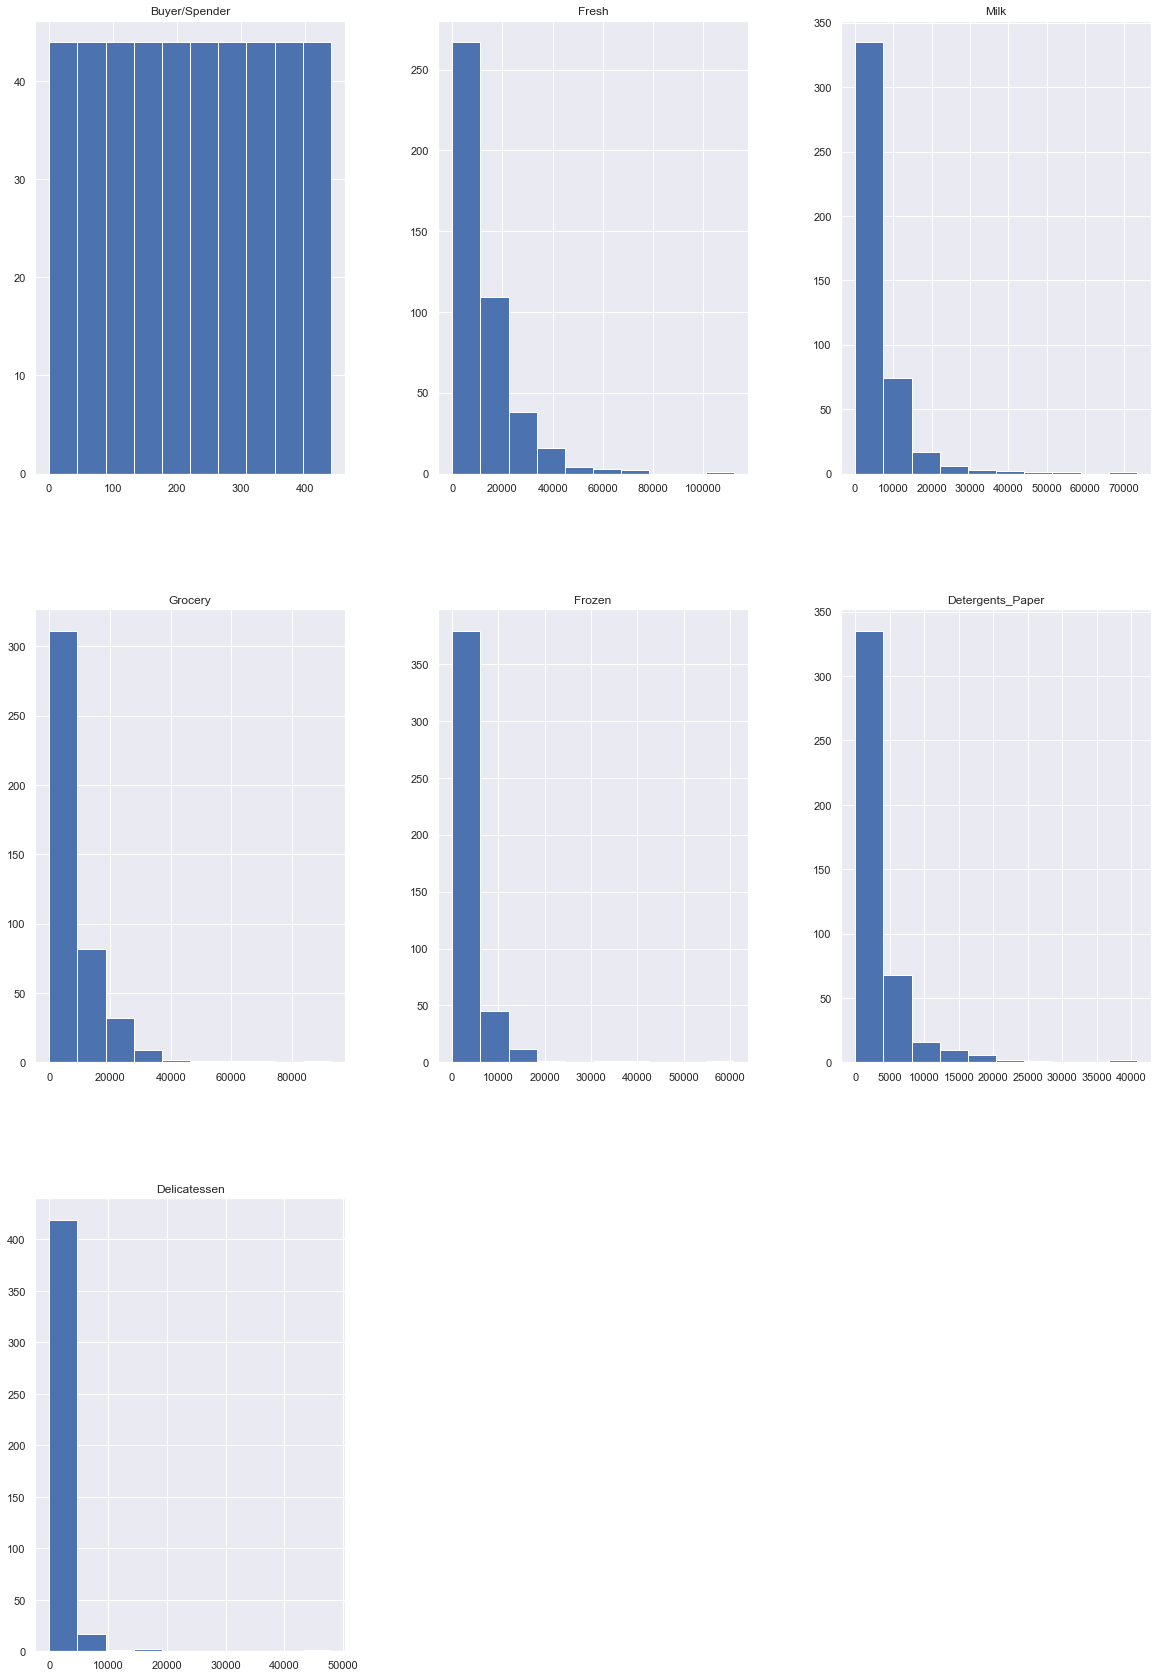

In [11]:
df.hist(figsize=(20,30))

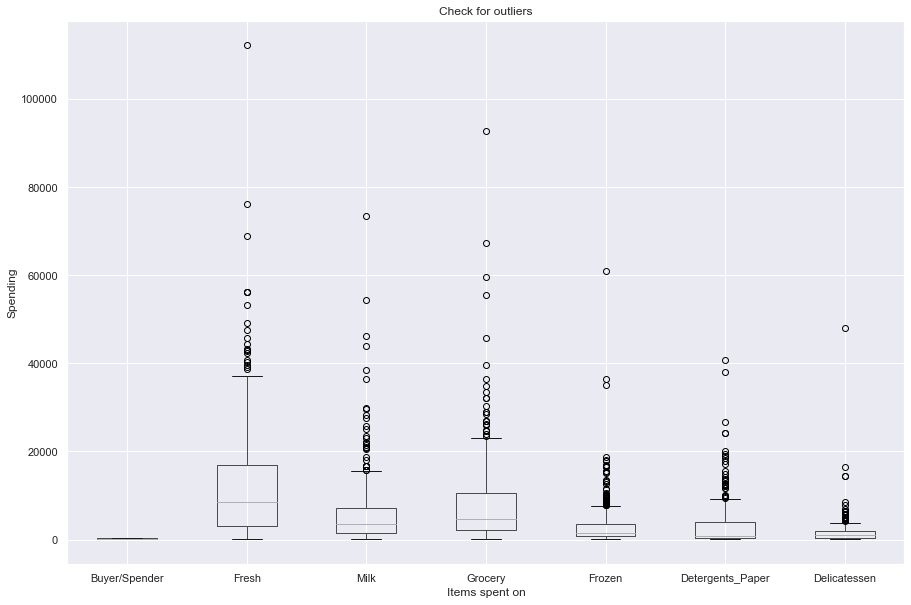

In [12]:
df.boxplot(figsize=(15,10))
plt.title("Check for outliers")
plt.ylabel('Spending')
plt.xlabel('Items spent on')
plt.show()


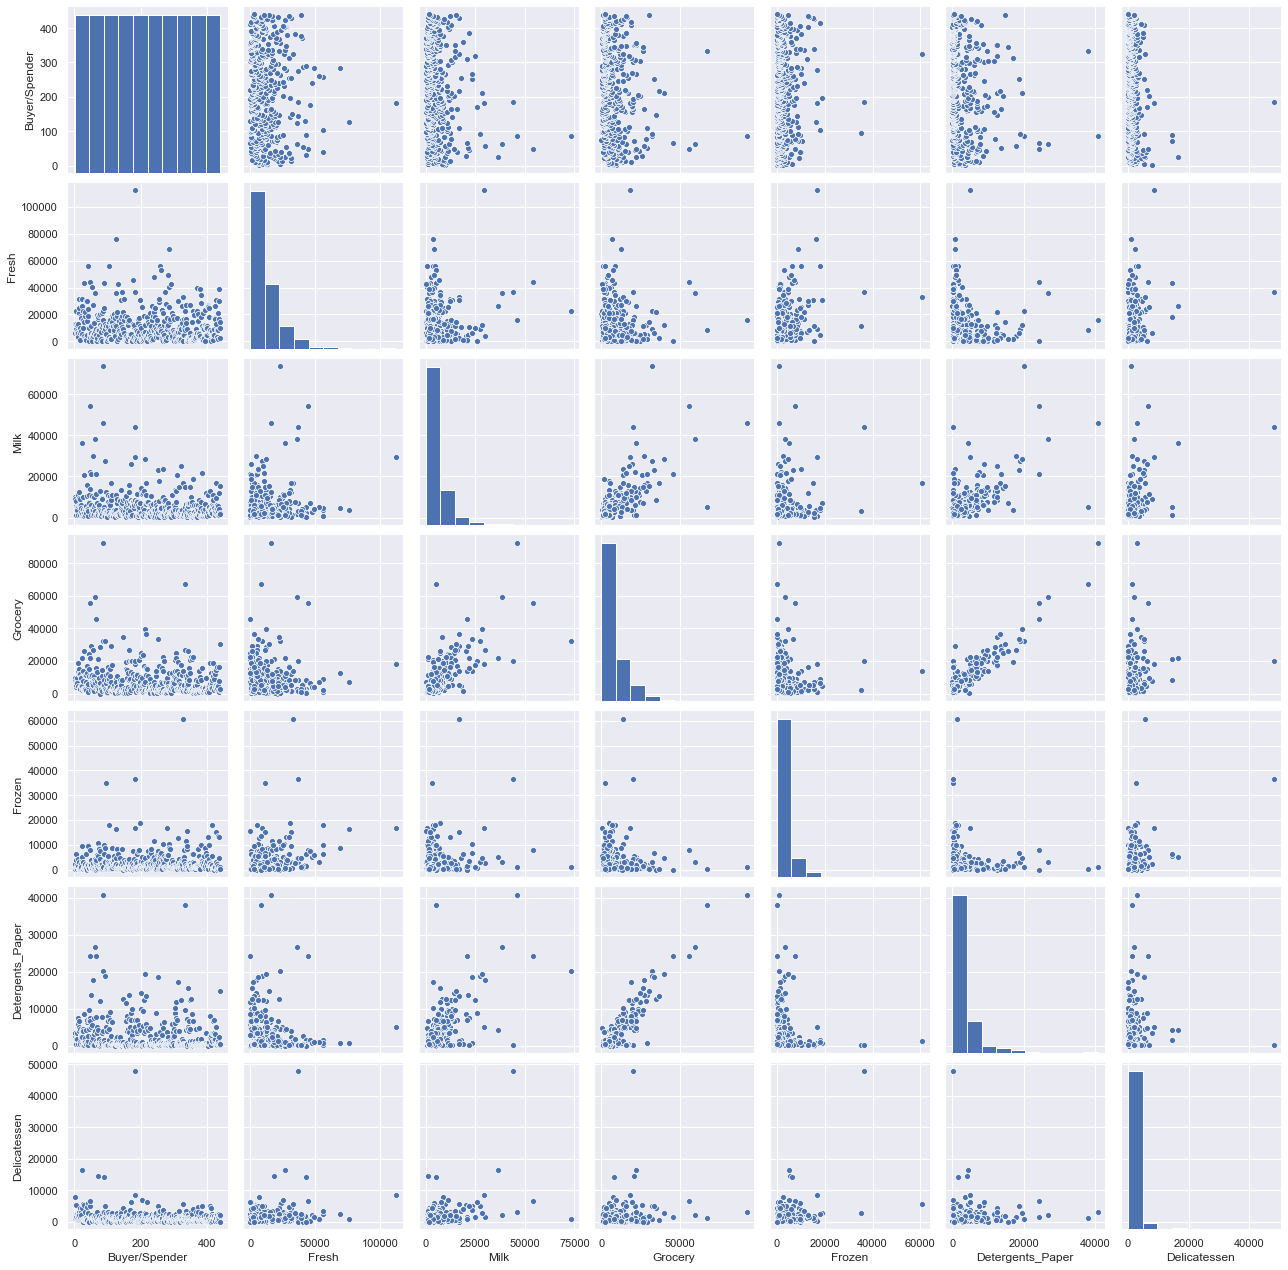

In [13]:
sns.pairplot(df)

In [14]:
df_1 = pd.read_csv(r"C:\Users\dell\Desktop\My docs\Data Science\Descriptive Statistics\Survey-1.csv")

In [15]:
df_1.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [16]:
daf = pd.crosstab(df_1['Gender'],df_1['Major'], margins = True)
daf.T

Gender,Female,Male,All
Major,,,
Accounting,3,4,7
CIS,3,1,4
Economics/Finance,7,4,11
International Business,4,2,6
Management,4,6,10
Other,3,4,7
Retailing/Marketing,9,5,14
Undecided,0,3,3
All,33,29,62


In [17]:
daf = pd.crosstab(df_1['Gender'],df_1['Computer'])
daf

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [18]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


In [19]:
df_1['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [20]:
df_1.shape

(62, 14)

In [21]:
pd.pivot_table(df_1, index=[ 'Grad Intention'],
                     columns=['Gender'], aggfunc=len,margins_name='All')

Age       Class      Computer      Employment         GPA  \
Gender         Female Male Female Male   Female Male     Female Male Female   
Grad Intention                                                                
No                  9    3      9    3        9    3          9    3    9.0   
Undecided          13    9     13    9       13    9         13    9   13.0   
Yes                11   17     11   17       11   17         11   17   11.0   

                      ... Salary       Satisfaction      Social Networking  \
Gender          Male  ... Female  Male       Female Male            Female   
Grad Intention        ...                                                    
No               3.0  ...    9.0   3.0            9    3                 9   
Undecided        9.0  ...   13.0   9.0           13    9                13   
Yes             17.0  ...   11.0  17.0           11   17                11   

                    Spending      Text Messages       
Gender         Male   Female Male        Female Male  
Grad Intention                                        
No                3        9    3             9    3  
Undecided         9       13    9            13    9  
Yes              17       11   17            11   17  

[3 rows x 24 columns]

In [22]:
daf2 = pd.crosstab(df_1['Gender'],df_1['Grad Intention'])
daf2.loc[["Female", "Male"],["Yes", "No"]]

Grad Intention,Yes,No
Gender,,
Female,11,9
Male,17,3


In [23]:
daf3 = pd.crosstab(df_1['Gender'],df_1['Computer'])
daf3.loc[["Female", "Male"]]

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [24]:
daf4 = pd.crosstab(df_1['Gender'],df_1['Employment'])
daf4

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [25]:
daf4 = pd.crosstab(df_1['Gender'],df_1['Major'])
daf4.T

Gender,Female,Male
Major,,
Accounting,3,4
CIS,3,1
Economics/Finance,7,4
International Business,4,2
Management,4,6
Other,3,4
Retailing/Marketing,9,5
Undecided,0,3


In [26]:
de = df_1[df_1['GPA'] < 3]
de

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
23,24,Male,22,Senior,Undecided,Yes,2.6,Full-Time,45.0,1,5,400,Laptop,600
27,28,Female,20,Junior,International Business,Yes,2.9,Part-Time,50.0,3,1,900,Laptop,100
31,32,Male,20,Junior,Other,Yes,2.9,Part-Time,47.0,3,1,300,Laptop,300
33,34,Male,22,Senior,Retailing/Marketing,Yes,2.6,Full-Time,40.0,1,4,1400,Laptop,800


In [27]:
de.shape

(17, 14)

In [28]:
de = df_1[df_1['Salary'] >50]
de

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
16,17,Female,19,Junior,CIS,Undecided,3.7,Part-Time,55.0,1,4,450,Laptop,150
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350
20,21,Female,22,Junior,Retailing/Marketing,Undecided,3.2,Part-Time,55.0,1,3,690,Laptop,50
21,22,Male,18,Sophomore,Accounting,Undecided,3.0,Unemployed,60.0,1,4,600,Laptop,500
22,23,Female,22,Senior,Retailing/Marketing,Undecided,3.0,Part-Time,55.0,0,4,300,Laptop,35


In [29]:
de.shape

(23, 14)

In [30]:
pd.crosstab(de['Gender'],de['Salary'], margins = True)

Salary,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,
Female,0,0,5,5,0,1,1,1,13
Male,1,1,3,3,1,0,0,1,10
All,1,1,8,8,1,1,1,2,23


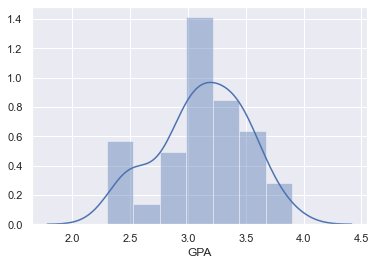

In [31]:
sns.distplot(df_1['GPA'],kde=True);

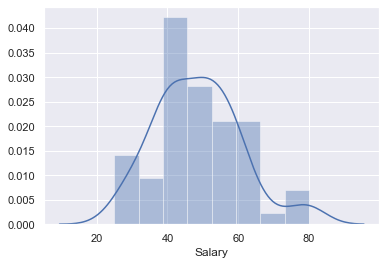

In [32]:
sns.distplot(df_1['Salary'],kde=True);


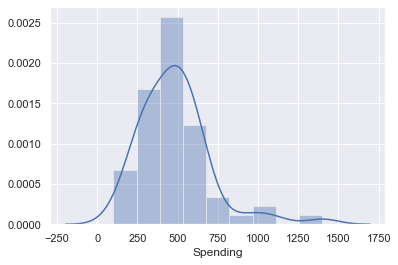

In [33]:
sns.distplot(df_1['Spending'],kde=True);

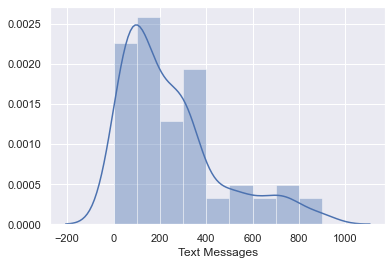

In [34]:
sns.distplot(df_1['Text Messages'],kde=True);

In [35]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


In [36]:
df_2 = pd.read_csv(r"C:\Users\dell\Desktop\My docs\Data Science\Descriptive Statistics\AB_shingles.csv")

In [37]:
df_2.head(10)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [38]:
df_2.shape

(36, 2)

In [39]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [40]:
from scipy import stats
from scipy.stats import ttest_1samp,  ttest_ind

In [41]:
t_statistic, p_value = ttest_1samp(df_2.A, 0.35)

In [42]:
print("The t-stats for the sample is:", t_statistic)
print("The p-value of the sample is :", p_value)

The t-stats for the sample is: -1.4735046253382782
The p-value of the sample is : 0.14955266289815025


In [43]:
t_statistic, p_value = ttest_1samp(df_2.B, 0.35, nan_policy='omit')

In [44]:
print("The t-stats for the sample is:", t_statistic)
print("The p-value of the sample is :", p_value)

The t-stats for the sample is: -3.1003313069986995
The p-value of the sample is : 0.004180954800638365


H0 : mu(A)= mu(B)  

H1 : mu(A) is not equal to mu(B)  

Alpha = 0.05  



In [45]:
t_statistic, p_value  =  stats.ttest_rel(df_2['A'],df_2['B'], nan_policy = 'omit')
print('tstat  %1.3f' % t_statistic)    
print("p-value for one-tail:", p_value/2)

tstat  0.845
p-value for one-tail: 0.2025369351827176


In [47]:
print ("Paired two-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    

Paired two-sample t-test p-value= 0.4050738703654352
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
